<a href="https://colab.research.google.com/github/joshtenorio/mat494-mathmethods-datasci/blob/main/3_5_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.5/3.6 Homework
## 3.5 K-means
$k$-means clustering is a popular method of vector quantization that aims to partition $n$ observations into $k$ clusters in which each observation belongs to th ecluster with the nearest mean.
This minimizes within-cluster variances (i.e., squared Euclidean distances) but not regular Euclidean distances.
$k$-means generally converge quickly to a local optimum, however the problem is labelled NP-hard.

The specific definition is as follows:
Given a $(x_1,x_2,...,x_n)$ where each observation is a $d$-dimensional real vector, k-means clustering aims to partition the $n$ observations into $k$ sets $S=\{S_1,...,S_k\}$ such that the within-cluster sum of squares (WCSS) is minimized.

Scipy has an implementation of the k-means algorithm, with steps outlined below:
1. Cluster data into $k$ groups where $k$ is predefined.
2. Select $k$ points at random as cluster centers
3. Assign objects to their closest cluster center according to the Euclidean distance function
4. Calculate the mean of all objects in each cluster.
5. Repeat 2,3,4 until the same points are assigned to each cluster in consecutive rounds.

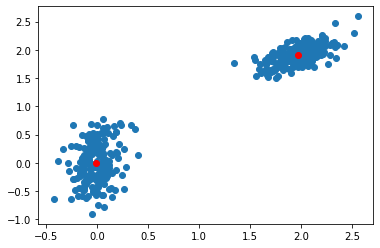

In [5]:
import numpy as np
from scipy.cluster.vq import vq, kmeans, whiten
import matplotlib.pyplot as plt

# Create 200 datapoints in two clusters a and b
pts = 200
rng = np.random.default_rng()
a = rng.multivariate_normal([0, 0], [[4, 1], [1, 4]], size=pts)
b = rng.multivariate_normal([30, 10],
                            [[10, 2], [2, 1]],
                            size=pts)
features = np.concatenate((a, b))

# Whiten data
whitened = whiten(features)

# Find 2 clusters in the data
codebook, distortion = kmeans(whitened, 2)

# Plot whitened data and cluster centers in red
plt.scatter(whitened[:, 0], whitened[:, 1])
plt.scatter(codebook[:, 0], codebook[:, 1], c='r')
plt.show()

## 3.6 Support Vector Machines
Support-vector machines (SVMs) are supervised learning models that aim to analyze data for classification and regression analysis.
The goal is that given a set of training examples (each marked as belonging to one of two categories) an SVM training algorithm would build a model that assigns new examples to one category or the other.
In otherwords an SVM maps training examples to pionts in space such that the width of the gap between the two categoreis is maximized, and predictions of new data are based on which side of the gap they fall.